In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import acquire as aq

## Exercises

**Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.**

### Acquire 

After doing some research, some experimentation of performing actions and watching the logs, we discovered what each of the fields represent. We then parse and name the fields accordingly.

#### Acquired data using dowloaded .txt file from google classroom

In [4]:
# Create a list of column names to use when the data is read
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
# read the dowloaded text file as a dataframe
df = pd.read_csv("curriculum-access.txt",
                 sep="\s", # separator = any white space
                 header=None, # don't include a header
                 names = colnames, # Use the column names created in colnames list
                 usecols=[0, 2, 3, 4, 5]) # Unsure of this paramaters function
df.head() # display the first five rows

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


### Prepare

In [5]:
# Convert the date column type to a pandas datetime 
df.date = pd.to_datetime(df.date) 
# Set the date column as the index
df = df.set_index(df.date)
# Create a series that includes the number of pages accessed per day
pages = df['endpoint'].resample('d').count()
# Display the first five rows in the series
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

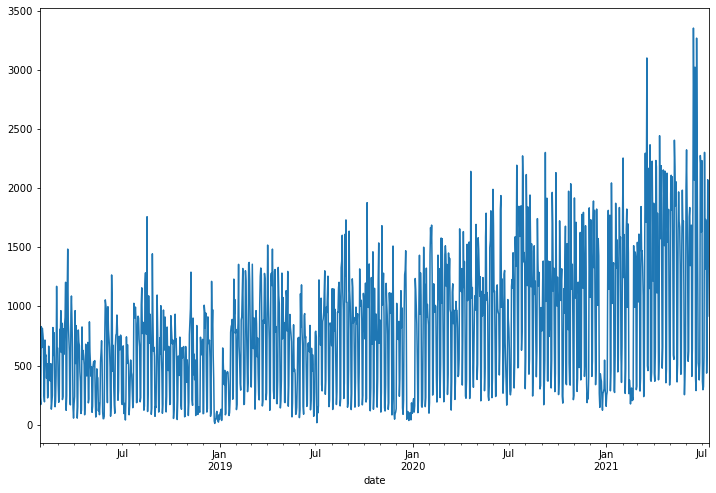

In [6]:
# Plot the number of pages viewed per day
plt.figure(figsize=(12,8))
pages.plot()
plt.show()

### Exponential Moving Average

In [7]:
# Create a 7 day EMA
ema_7d = pages.ewm(span=7).mean() # create a series representing an exponential moving average over 7 days
ema_7d.head() # Display first 5 rows in the series

date
2018-01-26    572.000000
2018-01-27    376.571429
2018-01-28    287.243243
2018-01-29    485.737143
2018-01-30    540.235595
Freq: D, Name: endpoint, dtype: float64

In [8]:
# Create a 14 day EMA
ema_14d = pages.ewm(span=14).mean() # create a series representing an exponential moving average over 14 days
ema_14d.head() # Display first 5 rows in the series

date
2018-01-26    572.000000
2018-01-27    388.785714
2018-01-28    305.208829
2018-01-29    465.757252
2018-01-30    514.347700
Freq: D, Name: endpoint, dtype: float64

In [9]:
# Create a 30 day EMA
ema_30d = pages.ewm(span=30).mean() # create a series representing an exponential moving average over 30 days
ema_30d.head() # Display first 5 rows in the series

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [10]:
# Create a 90 day EMA
ema_90d = pages.ewm(span=90).mean() # create a series representing an exponential moving average over 90 days
ema_90d.head() # Display first 5 rows in the series

date
2018-01-26    572.000000
2018-01-27    399.100000
2018-01-28    321.030081
2018-01-29    452.545042
2018-01-30    494.228442
Freq: D, Name: endpoint, dtype: float64

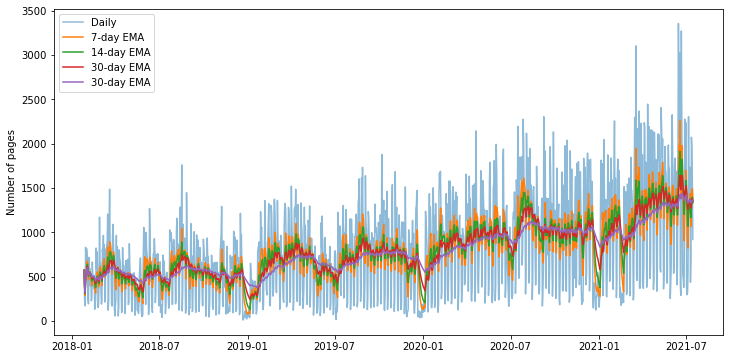

In [11]:
# Plot all of these EMA series together

# Set the fig aurend axis objects
fig, ax = plt.subplots(figsize=(12,6))

# Plot the daily values
ax.plot(pages.index, pages, label='Daily', alpha=.5)
# Plot the 7 day EMA
ax.plot(pages.index, ema_7d, label = '7-day EMA')
# Plot the 14 day EMA
ax.plot(pages.index, ema_14d, label = '14-day EMA')
# Plot the 30 day EMA
ax.plot(pages.index, ema_30d, label = '30-day EMA')
# Plot the 90 day EMA
ax.plot(pages.index, ema_90d, label = '30-day EMA')
# Create a legend
ax.legend(loc='best')
# Set the y-axis label
ax.set_ylabel('Number of pages')
# Display the plot
plt.show()

### Bollinger Bands and %b


In [12]:
# Define the window span
span = 30

midband = pages.ewm(span=span).mean() # Calculate midband with a series that represents 30 day EMA

midband.head() # Display first 5 rows

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [16]:
#Calculate the exponential standard deviation by using rolling exponential weighted stdev over 30 days

stdev = pages.ewm(span=span).std() 

stdev.head() # Display first 5 rows

date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.878138
2018-01-29    316.467837
2018-01-30    284.479727
Freq: D, Name: endpoint, dtype: float64

In [17]:
# Calculate upper and lower bands
# by  setting the upper band as 3 standard deviations above the midband
ub = midband + stdev*3
# and the lower band as 3 standard deviations below the midband
lb = midband - stdev*3
ub # Display results of upper band

date
2018-01-26            NaN
2018-01-27    1120.791557
2018-01-28     956.773991
2018-01-29    1406.405897
2018-01-30    1354.808245
                 ...     
2021-07-11    3828.085288
2021-07-12    3867.319606
2021-07-13    3869.549128
2021-07-14    3801.913356
2021-07-15    3717.907020
Freq: D, Name: endpoint, Length: 1267, dtype: float64

In [18]:
lb # Display results of lower band

date
2018-01-26            NaN
2018-01-27    -330.191557
2018-01-28    -326.494835
2018-01-29    -492.401124
2018-01-30    -352.070116
                 ...     
2021-07-11   -1278.746498
2021-07-12   -1214.970415
2021-07-13   -1135.932143
2021-07-14   -1046.207143
2021-07-15   -1021.407660
Freq: D, Name: endpoint, Length: 1267, dtype: float64

In [19]:
# Concatenate the upper bound and lower bound together into one df called bb
bb = pd.concat([ub, lb], axis=1)
bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,1120.791557,-330.191557
2018-01-28,956.773991,-326.494835
2018-01-29,1406.405897,-492.401124
2018-01-30,1354.808245,-352.070116


In [20]:
# Concatenate the data frame of page views with the midband, upper and lower bands
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557
2018-01-28,170,315.139578,956.773991,-326.494835
2018-01-29,830,457.002386,1406.405897,-492.401124
2018-01-30,652,501.369064,1354.808245,-352.070116


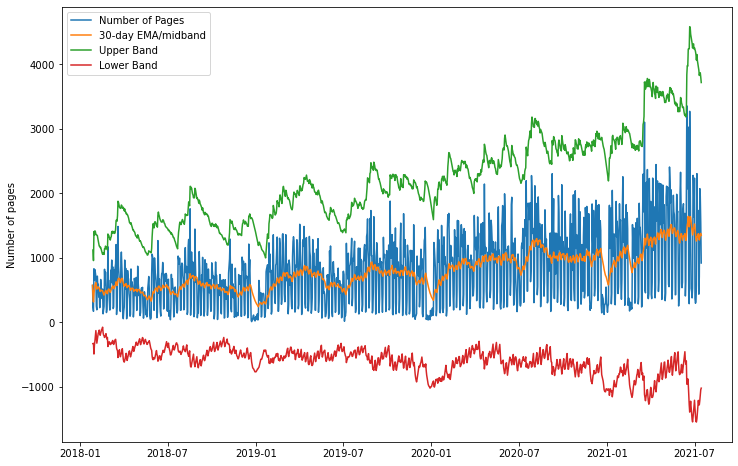

In [21]:
# Plot all of the bands together

# Set the figure and axis objects and establish the figure size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the index against the number of page views
ax.plot(my_df.index, my_df.pages, label='Number of Pages')
# Plot the index against the midband, then the upper and lower band
ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
# Create a legend
ax.legend(loc='best')
# Set the y-axis label
ax.set_ylabel('Number of pages')
# Display the plot
plt.show()

In [22]:
# get the last measure of gb
last_measure = my_df.iloc[-1].pages
last_measure

919.0

In [23]:
# get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb

-1021.4076601733216

In [24]:
# get the upper band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub

3717.907020003997

In [25]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))

%b for last datapoint:  0.41


In [26]:
my_df.tail(3) # Display first 3 rows

,pages,midband,ub,lb
date,,,,
2021-07-13,1956,1366.808493,3869.549128,-1135.932143
2021-07-14,1538,1377.853106,3801.913356,-1046.207143
2021-07-15,919,1348.249680,3717.907020,-1021.407660


*So, to compute for each point in time:*

In [27]:
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()


,pages,midband,ub,lb,pct_b
date,,,,,
2018-01-26,572,572.000000,NaN,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557,0.386077
2018-01-28,170,315.139578,956.773991,-326.494835,0.386899
2018-01-29,830,457.002386,1406.405897,-492.401124,0.696438
2018-01-30,652,501.369064,1354.808245,-352.070116,0.588249


*Now, where do we see anomalies? We will search for %b values > 1. We don't need to search for values < 0 because with this example, a low extreme is not something we are concerned about.*

In [29]:
my_df[my_df['pct_b']>1]

,pages,midband,ub,lb,pct_b
date,,,,,


#### Pull it all together!
1. acquire
2. prep with user
3. compute features
- compute midband
- compute standard deviation
- compute upper & lower band
- create df with metrics
- compute %b
- add user_id to dataframe
4. Plot
5. search for anomalies

In [30]:
def acquire(file_name, column_names):
    '''
    Takes in a filename and list of columns, then reads a csv file that has it's white space separated into a dataframe.
    '''
    return pd.read_csv(file_name, sep="\s", header=None, names=column_names, usecols=[0, 2, 3, 4, 5])

def prep(df, user):
    '''Takes in a dataframe of user access logs, and a user id, filters
    the dataframe for only that user, converts the date column to a datetime type index, 
    resamples by day and returns the total number of page views for that day.'''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    ''' 
    Takes in a dataframe of page views, a timespan, 
    a weight (number of standard deviations), and a user_id, creates
    a dataframe of bollinger band and %b values for page views for that user. 
    '''
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plt_bands(my_df, user):
    '''
    Takes in a data frame created using the compute_pct_b function and 
    plots the bollinger bands.
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    '''
    Takes in the dataframe created in the compute_pct_b function, 
    identifies entries where the %b value is greater than 1, indicating
    an anomaly. Returns the rows of the dataframe identified as anomalies. 
    '''
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

### Acquire

In [31]:
# Set a file name 
file_name = 'curriculum-access.txt'
# Set the column names 
column_names = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
# Use the acquire function to read the csv and assign column names
df = acquire(file_name, column_names)
df.head() # Displays first 5 rows

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


*Test on a single user*

In [32]:
user = 1   # Identify the user
span = 30  # Sets a span of 30 days for calculating moving averages
weight = 6 # Sets a weight of 6

# Uses the find_anomalies function to identify entries where
# user 1's activity was anomalous, based on a 30 day span and 
# a weight of 6
anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [33]:
anomalies # no anomalies found 

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,


*Loop through all users*

In [34]:
span = 30  # Sets a span of 30 days for calculating moving averages
weight = 3.5 # Sets a weight of 3.5

# Loop through all users to find entries where 
# activity was anomalous based on the established span and weight
anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [35]:
anomalies # Anomalies found after changing the weight and by looking through all users

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-06-02,72,10.456225,71.377304,-50.464854,1.005111,925
2021-06-29,32,3.881578,31.571606,-23.808449,1.007736,929
2021-06-11,44,5.582783,43.858655,-32.693089,1.001846,961
